In [6]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn import mixture

In [7]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
THERESA_MAY_COLOR = '#b7c631'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
LEOMESSI_COLOR = '#e8d2d0'

CRISTIANO_RONALDO = 'cristiano'
CRISTIANO_RONALDO_COLOR = '#bec6c0'

RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

# sport clubs
REAL_MADRID = 'realmadrid'
FC_BARCELONA = 'fcbarcelona'


LIST_ALL_USERS = [DONALD_TRUMP , BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, FLOTUS, CNN, FOXNEWS, BBC, LEOMESSI, CRISTIANO_RONALDO,RAFAEL_NADAL ]

# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/koosha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/koosha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
df = pd.read_excel('../Similarity/dataset_impersonator_with_all.xlsx')
print(df.shape[0])

3832


In [9]:
df.columns

Index(['owener_id', 'combined_username', 'combined_full_name',
       'combined_biography', 'combined_profile_pic_url',
       'combined_profile_pic', 'combined_follower', 'combined_followee',
       'combined_mediacount', 'combined_owener_external_url',
       'combined_is_verified', 'combined_is_private', 'comment_db_id',
       'comment_id', 'comment_created_at', 'comment_post_shortcode',
       'comment_shortcode_username', 'comment_text', 'like_id',
       'like_post_shortcode', 'like_shortcode_username',
       'combined_similarity_username', 'combined_similarity_full_name',
       'combined_similarity_biography', 'comment_total', 'like_total',
       'combined_similarity_photo_comment', 'combined_similarity_photo_like'],
      dtype='object')

In [5]:
df['combined_similarity_photo_like'].fillna("--", inplace=True)
df['combined_similarity_photo_comment'].fillna("--", inplace=True)

In [6]:
def get_first_element_in_like_similarity(_row):

    temp = 0
    
    if (not _row['combined_similarity_photo_like'] == "--"):
        photo_similarities = _row['combined_similarity_photo_like'].split(",,,")
        
        if (photo_similarities[0] == 'True'):
            temp = 1
        else:
            temp = 0
            
    _row['combined_similarity_photo'] = temp
        
    return _row

df = df.apply(get_first_element_in_like_similarity, axis=1)

In [7]:
# df.columns
# df[['owener_id', 'combined_shortcode_username', 'total_comment', 'comment_created_at', 'comment_id',
#        'comment_post_shortcode', 'comment_shortcode_username', 'comment_text']]
df_dataset = df[[
        'combined_similarity_username', 
        'combined_similarity_full_name',
        'combined_similarity_biography',
        'combined_similarity_photo',


    'combined_follower',     
    'combined_followee',
    'combined_mediacount',
    'combined_is_private',
    'combined_is_verified', 

#        'comment_created_at', 'comment_id', 'comment_post_shortcode',
#        'comment_shortcode_username', 'comment_text', 
   
   ]]

df_dataset.columns = ['username', 'name', 'bio', 'photo', 'follower', 'followee', 'mediacount', 'private', 'verified']
df_dataset['class'] = 'impersonator'

/home/koosha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
#boolean to int
df_dataset[[ 'private', 'verified']] = df_dataset[['private', 'verified']].astype(int)

/home/koosha/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [9]:
def calculate_least_common_metrics(_row):

    _row['lcm'] = 0
    
    if (_row['username'] > 0):
        _row['lcm'] =  1
        return _row
    
    if (_row['name'] > 0):
        _row['lcm'] =  1
        return _row
    
    if (_row['bio'] > 0):
        _row['lcm'] =  1
        return _row
    
    if (_row['photo'] > 0):
        _row['lcm'] =  1
        return _row
        
    return _row

df_dataset = df_dataset.apply(calculate_least_common_metrics, axis=1)

In [10]:
def calculate_most_common_metrics(_row):

    _row['mcm'] = 0
    
    if (_row['username'] > 0):
        _row['mcm'] = _row['mcm'] + 1
    
    if (_row['name'] > 0):
        _row['mcm'] = _row['mcm'] + 1
    
    if (_row['bio'] > 0):
        _row['mcm'] = _row['mcm'] + 1
        
    if (_row['photo'] > 0):
        _row['mcm'] = _row['mcm'] + 1
        
    return _row

df_dataset = df_dataset.apply(calculate_most_common_metrics, axis=1)

In [11]:
#reorder
df_dataset = df_dataset[['username', 'name', 'bio', 'photo', 'follower', 'followee', 'mediacount', 'private', 'verified', 'lcm', 'mcm', 'class']]
# df_dataset = df_dataset[['follower', 'followee', 'mediacount', 'private', 'verified', 'lcm', 'mcm', 'class']]
df_total = df_dataset

In [12]:
# normalize 
column_names_to_normalize = ['follower']#, 'followee', 'mediacount']
x = df_total[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_total['nfollower'] = x_scaled

column_names_to_normalize = ['followee']#, 'followee', 'mediacount']
x = df_total[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_total['nfollowee'] = x_scaled


column_names_to_normalize = ['mediacount']#, 'followee', 'mediacount']
x = df_total[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_total['nmediacount'] = x_scaled


column_names_to_normalize = ['mcm']#, 'followee', 'mediacount']
x = df_total[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_total['nmcm'] = x_scaled

/home/koosha/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/koosha/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/koosha/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/koosha/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
df_final = df_total[['username', 'name', 'bio', 'photo', 'nfollower', 'nfollowee', 'nmediacount', 'follower', 'followee', 'mediacount', 'private', 'verified', 'lcm', 'mcm', 'nmcm', 'class']]
df_final.head()

username  name       bio  photo  nfollower  nfollowee  nmediacount  \
0  0.303216   0.0  0.000000      0   0.000022   0.052744     0.006037   
1  0.000000   0.0  0.379978      0   0.002047   0.181007     0.013694   
2  0.000000   0.0  0.407353      0   0.000332   0.131993     0.015847   
3  0.000000   0.0  0.482680      0   0.000162   0.079382     0.011386   
4  0.000000   0.0  0.303216      0   0.000061   0.055940     0.003862   

   follower  followee  mediacount  private  verified  lcm  mcm  nmcm  \
0       170       396         272        1         0    1    1   0.0   
1     15659      1359         617        0         0    1    1   0.0   
2      2539       991         714        0         0    1    1   0.0   
3      1240       596         513        1         0    1    1   0.0   
4       468       420         174        1         0    1    1   0.0   

          class  
0  impersonator  
1  impersonator  
2  impersonator  
3  impersonator  
4  impersonator

In [14]:
# kmeans
# OK
# df_kmean = df_total[['username', 'name', 'bio', 'photo', 'nfollower', 'nfollowee', 'nmediacount', 'private',  'class']]

# ok
# df_kmean = df_total[['nmcm', 'username', 'name', 'bio', 'photo',  'nfollower', 'class']]


# no
# df_kmean = df_total[['username', 'name', 'bio', 'photo', 'nfollower', 'nfollowee', 'nmediacount', 'private',  'verified', 'class']]

df_kmean = df_total[['nmcm', 'username', 'name', 'bio', 'photo',  'nfollower', 'class']]


#ok
# df_kmean = df_total[['username', 'name', 'bio', 'photo', 'nfollower', 'nfollowee', 'nmediacount', 'private', 'verified', 'lcm', 'mcm', 'class']]

# df_kmean = df_total[['username', 'name', 'bio', 'photo', 'follower', 'followee', 'mediacount', 'private',  'verified', 'class']]

df_kmean.head()

nmcm  username  name       bio  photo  nfollower         class
0   0.0  0.303216   0.0  0.000000      0   0.000022  impersonator
1   0.0  0.000000   0.0  0.379978      0   0.002047  impersonator
2   0.0  0.000000   0.0  0.407353      0   0.000332  impersonator
3   0.0  0.000000   0.0  0.482680      0   0.000162  impersonator
4   0.0  0.000000   0.0  0.303216      0   0.000061  impersonator

In [15]:
# Split-out validation dataset
array = df_kmean.values
X = array[:,0:len(df_kmean.columns)-1]
Y = array[:,len(df_kmean.columns)-1]
validation_size = 0.30
seed = 11
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# PCA 2D

In [16]:
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

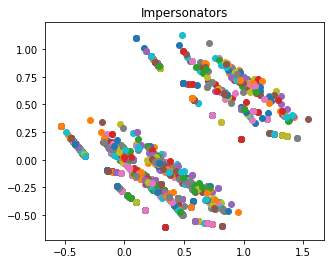

In [17]:
fig, (ax1) = plt.subplots(1,1, figsize=(5,4))

for i in range(0, pca_2d.shape[0]):
    ax1.scatter(pca_2d[i,0],pca_2d[i,1])

ax1.set_title('Impersonators')
# ax1.set_xscale('log')
# ax1.set_yscale('log')
plt.show()

In [18]:
df_pca_2d = pd.DataFrame({'1':pca_2d[:,0],'2':pca_2d[:,1]})

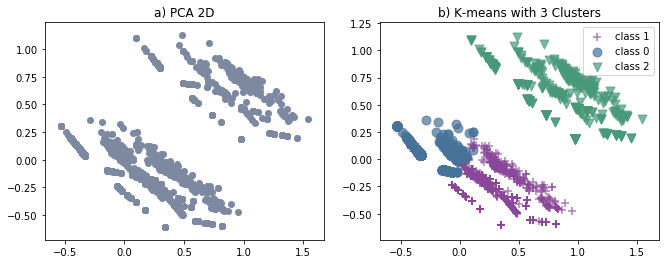

In [19]:
def plot_2():
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))

    for i in range(0, pca_2d.shape[0]):
        ax1.scatter(pca_2d[i,0],pca_2d[i,1], c='#7d89a0')

    ax1.set_title('a) PCA 2D')



    num=3
    kmeans = KMeans(n_clusters=num,  random_state=100)
    kmeans.fit(X)
    labels = kmeans.labels_
   
    for i in range(0, pca_2d.shape[0]):
        if labels[i] == 0:
            c12 = ax2.scatter(pca_2d[i,0],pca_2d[i,1],c='#8a4799',marker='+', alpha=0.7, s=80)
        elif labels[i] == 1:
            c22 = ax2.scatter(pca_2d[i,0],pca_2d[i,1],c='#477299',marker='o', alpha=0.7, s=80)
        elif labels[i] == 2:
            c32 = ax2.scatter(pca_2d[i,0],pca_2d[i,1],c='#479979',marker='v', alpha=0.7, s=80)

    ax2.legend([c12, c22, c32], ['class 1', 'class 0','class 2'])
    ax2.set_title('b) K-means with 3 Clusters')
    
    
    
#     num = 3
#     clustering = SpectralClustering(n_clusters=num, assign_labels="discretize",random_state=100).fit(X)
#     labels = clustering.labels_
   
#     for i in range(0, pca_2d.shape[0]):
#         if labels[i] == 0:
#             c13 = ax[1, 0].scatter(pca_2d[i,0],pca_2d[i,1],c='#8a4799',marker='+', alpha=0.7, s=80)
#         elif labels[i] == 1:
#             c23 = ax[1, 0].scatter(pca_2d[i,0],pca_2d[i,1],c='#477299',marker='o', alpha=0.7, s=80)
#         elif labels[i] == 2:
#             c33 = ax[1, 0].scatter(pca_2d[i,0],pca_2d[i,1],c='#479979',marker='v', alpha=0.7, s=80)

#     ax[1, 0].legend([c13, c23, c33], ['class 0', 'class 1','class 2'])
#     ax[1, 0].set_title('c) Spectral with 3 Clusters')
    
    
    
#     num = 3
#     gmm = GaussianMixture(n_components=num, random_state=10).fit(X)
#     labels = gmm.predict(X)
   
#     for i in range(0, pca_2d.shape[0]):
#         if labels[i] == 0:
#             c1 = ax[1, 1].scatter(pca_2d[i,0],pca_2d[i,1],c='#8a4799',marker='+', alpha=0.7, s=80)
#         elif labels[i] == 1:
#             c2 = ax[1, 1].scatter(pca_2d[i,0],pca_2d[i,1],c='#477299',marker='o', alpha=0.7, s=80)
#         elif labels[i] == 2:
#             c3 = ax[1, 1].scatter(pca_2d[i,0],pca_2d[i,1],c='#479979',marker='v', alpha=0.7, s=80)
# #         elif labels[i] == 3:
# #             c4 = ax2.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='+', alpha=0.7, s=80)

#     ax[1, 1].legend([c1, c2, c3], ['class 0', 'class 1','class 2'])
#     ax[1, 1].set_title('d) Gaussian Mixture with 3 Clusters')

    plt.savefig("plot_MLearning4_P2.pdf")
    plt.show()
    
plot_2()

# K-means by PCA 2D

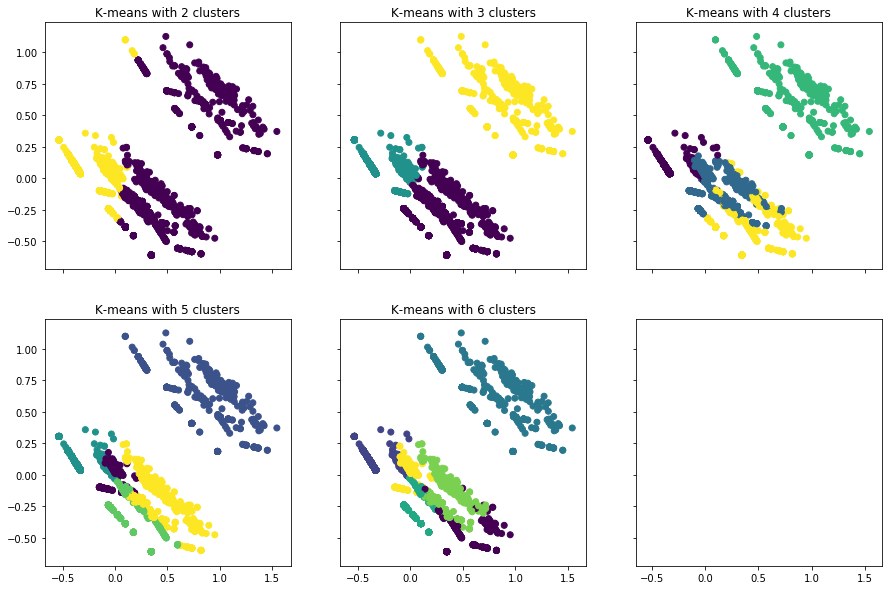

In [20]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15,10))

num=2
kmeans = KMeans(n_clusters=num, random_state=30)
kmeans.fit(X)
ax[0, 0].scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
ax[0, 0].set_title('K-means with %i clusters' %num)

num=3
kmeans = KMeans(n_clusters=num,  random_state=100)
kmeans.fit(X)
ax[0, 1].scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
ax[0, 1].set_title('K-means with %i clusters' %num)


num=4
kmeans = KMeans(n_clusters=num,  random_state=100)
kmeans.fit(X)
ax[0, 2].scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
ax[0, 2].set_title('K-means with %i clusters' %num)

num=5
kmeans = KMeans(n_clusters=num,  random_state=100)
kmeans.fit(X)
ax[1, 0].scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
ax[1, 0].set_title('K-means with %i clusters' %num)


num=6
kmeans = KMeans(n_clusters=num,  random_state=100)
kmeans.fit(X)
ax[1, 1].scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
ax[1, 1].set_title('K-means with %i clusters' %num)

plt.show()

# Spectral Clustering by PCA 2D

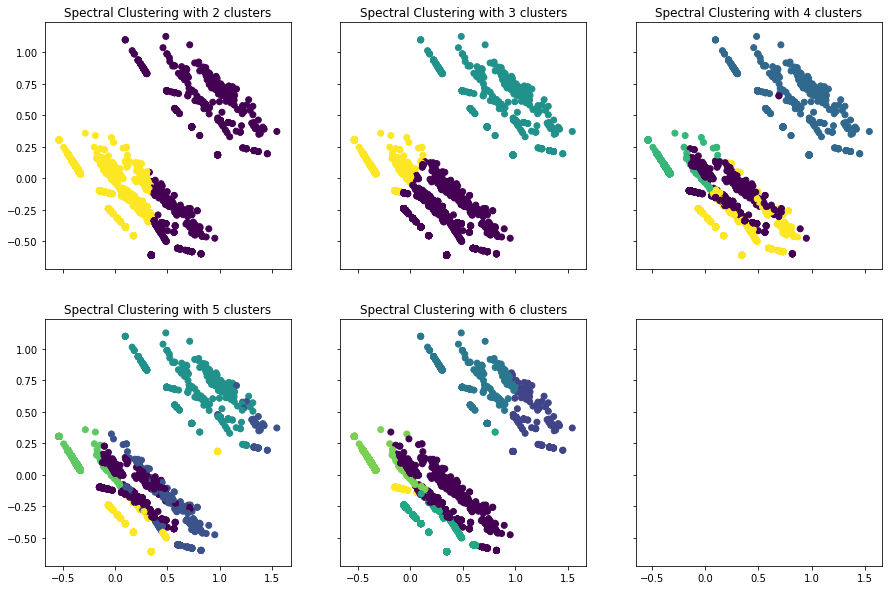

In [21]:


fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15,10))

num = 2
clustering = SpectralClustering(n_clusters=num, assign_labels="discretize",random_state=100).fit(X)
ax[0, 0].scatter(pca_2d[:, 0], pca_2d[:, 1], c=clustering.labels_)
ax[0, 0].set_title('Spectral Clustering with %i clusters' %num)

num = 3
clustering = SpectralClustering(n_clusters=num, assign_labels="discretize",random_state=100).fit(X)
ax[0, 1].scatter(pca_2d[:, 0], pca_2d[:, 1], c=clustering.labels_)
ax[0, 1].set_title('Spectral Clustering with %i clusters' %num)

num=4
clustering = SpectralClustering(n_clusters=num, assign_labels="discretize",random_state=100).fit(X)
ax[0, 2].scatter(pca_2d[:, 0], pca_2d[:, 1], c=clustering.labels_)
ax[0, 2].set_title('Spectral Clustering with %i clusters' %num)

num = 5
clustering = SpectralClustering(n_clusters=num, assign_labels="discretize",random_state=100).fit(X)
ax[1, 0].scatter(pca_2d[:, 0], pca_2d[:, 1], c=clustering.labels_)
ax[1, 0].set_title('Spectral Clustering with %i clusters' %num)

num = 6
clustering = SpectralClustering(n_clusters=num, assign_labels="discretize",random_state=100).fit(X)
ax[1, 1].scatter(pca_2d[:, 0], pca_2d[:, 1], c=clustering.labels_)
ax[1, 1].set_title('Spectral Clustering with %i clusters' %num)

plt.show()

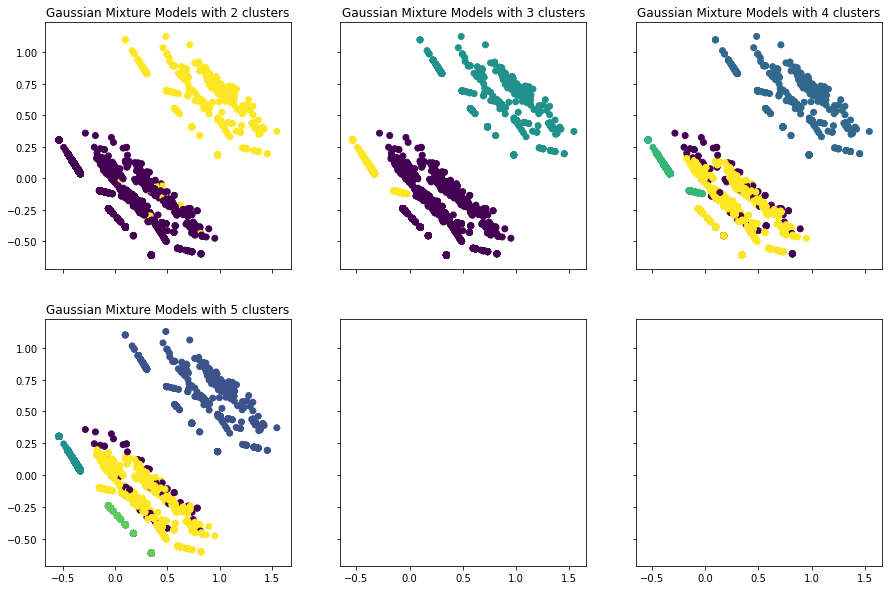

In [22]:

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15,10))

num = 2
gmm = GaussianMixture(n_components=num).fit(X)
labels = gmm.predict(X)
ax[0, 0].scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels)
ax[0, 0].set_title('Gaussian Mixture Models with %i clusters' %num)

num = 3
gmm = GaussianMixture(n_components=num, random_state=10).fit(X)
labels = gmm.predict(X)
ax[0, 1].scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels)
ax[0, 1].set_title('Gaussian Mixture Models with %i clusters' %num)

num = 4
gmm = GaussianMixture(n_components=num, random_state=10).fit(X)
labels = gmm.predict(X)
ax[0, 2].scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels)
ax[0, 2].set_title('Gaussian Mixture Models with %i clusters' %num)

num = 5
gmm = GaussianMixture(n_components=num, random_state=10).fit(X)
labels = gmm.predict(X)
ax[1, 0].scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels)
ax[1, 0].set_title('Gaussian Mixture Models with %i clusters' %num)

plt.show()

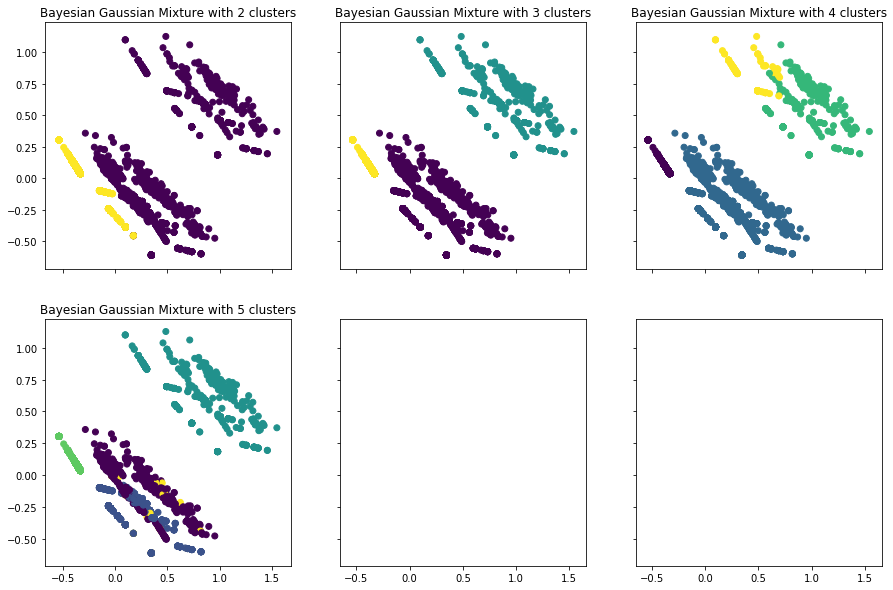

In [23]:


fig, ax = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15,10))

num = 2
dpgmm = mixture.BayesianGaussianMixture(n_components=num,covariance_type='full').fit(X)
labels = dpgmm.predict(X)
ax[0, 0].scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels)
ax[0, 0].set_title('Bayesian Gaussian Mixture with %i clusters' %num)

num = 3
dpgmm = mixture.BayesianGaussianMixture(n_components=num).fit(X)
labels = dpgmm.predict(X)
ax[0, 1].scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels)
ax[0, 1].set_title('Bayesian Gaussian Mixture with %i clusters' %num)

num = 4
dpgmm = mixture.BayesianGaussianMixture(n_components=num).fit(X)
labels = dpgmm.predict(X)
ax[0, 2].scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels)
ax[0, 2].set_title('Bayesian Gaussian Mixture with %i clusters' %num)

num = 5
dpgmm = mixture.BayesianGaussianMixture(n_components=num).fit(X)
labels = dpgmm.predict(X)
ax[1, 0].scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels)
ax[1, 0].set_title('Bayesian Gaussian Mixture with %i clusters' %num)

plt.show()

In [24]:

num = 3
dpgmm = mixture.BayesianGaussianMixture(n_components=num).fit(X)
labels = dpgmm.predict(X)
df_final['class BGM 3'] = labels

num = 3
gmm = GaussianMixture(n_components=num, random_state=10).fit(X)
labels = gmm.predict(X)
df_final['class GM 3'] = labels


num=3
kmeans = KMeans(n_clusters=num,  random_state=100)
kmeans.fit(X)
df_final['class kmeans 3'] = kmeans.labels_


num = 3
clustering = SpectralClustering(n_clusters=num, assign_labels="discretize",random_state=100).fit(X)
df_final['class spectral 3'] = clustering.labels_


num = 4
gmm = GaussianMixture(n_components=num, random_state=10).fit(X)
labels = gmm.predict(X)
df_final['class GM 4'] = labels


/home/koosha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/koosha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/koosha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [25]:
df.columns

Index(['owener_id', 'combined_username', 'combined_full_name',
       'combined_biography', 'combined_profile_pic_url',
       'combined_profile_pic', 'combined_follower', 'combined_followee',
       'combined_mediacount', 'combined_owener_external_url',
       'combined_is_verified', 'combined_is_private', 'comment_db_id',
       'comment_id', 'comment_created_at', 'comment_post_shortcode',
       'comment_shortcode_username', 'comment_text', 'like_id',
       'like_post_shortcode', 'like_shortcode_username',
       'combined_similarity_username', 'combined_similarity_full_name',
       'combined_similarity_biography', 'comment_total', 'like_total',
       'combined_similarity_photo_comment', 'combined_similarity_photo_like',
       'combined_similarity_photo'],
      dtype='object')

In [26]:
df_final['owener_id'] = df['owener_id']
# df_final['combined_shortcode_username'] = df['combined_shortcode_username']
df_final['combined_owener_external_url'] = df['combined_owener_external_url']
df_final['combined_username'] = df['combined_username']
df_final['combined_full_name'] = df['combined_full_name']
df_final['combined_profile_pic_url'] = df['combined_profile_pic_url']
df_final['combined_biography'] = df['combined_biography']
df_final['combined_similarity_photo_comment'] = df['combined_similarity_photo_comment']
df_final['combined_similarity_photo_like'] = df['combined_similarity_photo_like']

df_final['comment_created_at'] = df['comment_created_at']
df_final['comment_id'] = df['comment_id']
df_final['comment_post_shortcode'] = df['comment_post_shortcode']
df_final['comment_shortcode_username'] = df['comment_shortcode_username']
df_final['comment_text'] = df['comment_text']
df_final['comment_total'] = df['comment_total']
df_final['owener_id'] = df['owener_id']
df_final['comment_text'] = df['comment_text']

df_final['like_total'] = df['like_total']
df_final['like_shortcode_username'] = df['like_shortcode_username']
df_final['like_post_shortcode'] = df['like_post_shortcode']
df_final['like_id'] = df['like_id']


/home/koosha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/koosha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/koosha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [27]:
# df_grouped = df_final.groupby('class kmeans 4').describe()
df_final.to_csv("clustered_data_new.csv")

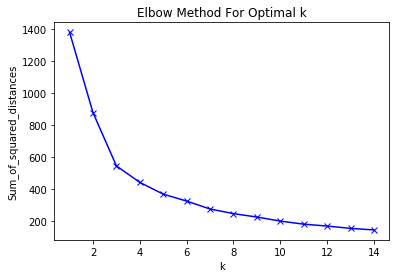

In [28]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# K-means demonstrated by two columns

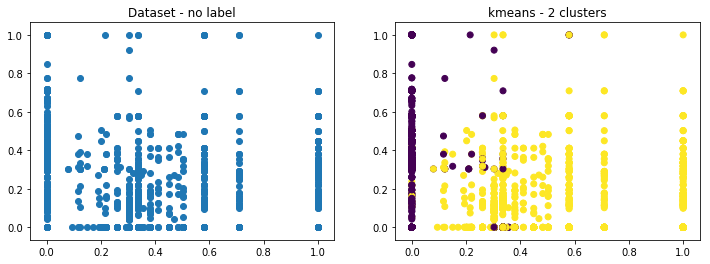

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

# Dataset Slicing
x_axis = X[:, 2]
y_axis = X[:, 3]  
ax1.scatter(x_axis, y_axis)
ax1.set_title('Dataset - no label')


model = KMeans(n_clusters=2)
model.fit(X)
all_predictions = model.predict(X)
ax2.scatter(x_axis, y_axis, c=all_predictions)
ax2.set_title('kmeans - 2 clusters')

plt.show()